# Exercise 1 - Calculate $\pi$

Using the **DSMC method**, calculate the value of **$\pi$**.


**Approach:**
In order to do this, create a 2-dimensional domain (defined by the coordinates $x_{min}, x_{max}, y_{min}, y_{max}$) and launch a number P of particles at random locations within. Check which particles lie inside a circle with radius $$ \frac{x_{max}-x_{min}}{2}, $$ where $x_{min}, x_{max}$ are the x-limits of your 2D domain. 

Get your value for $\pi$ by using the following formula:
$\pi = \frac{4 \cdot n_{inside}}{P}, $  where $n_{inside}$ is the number of particles inside the circle and $P$ is the total number of particles.

**a)** Play around with the number of particles and plot your calculated value as a function of this number. 

**b)** Also plot the difference between the value you obtained for $\pi$ and the real one (as a function of P). 

**c)** Make a plot for your domain, highlighting the particles that are inside the circle.

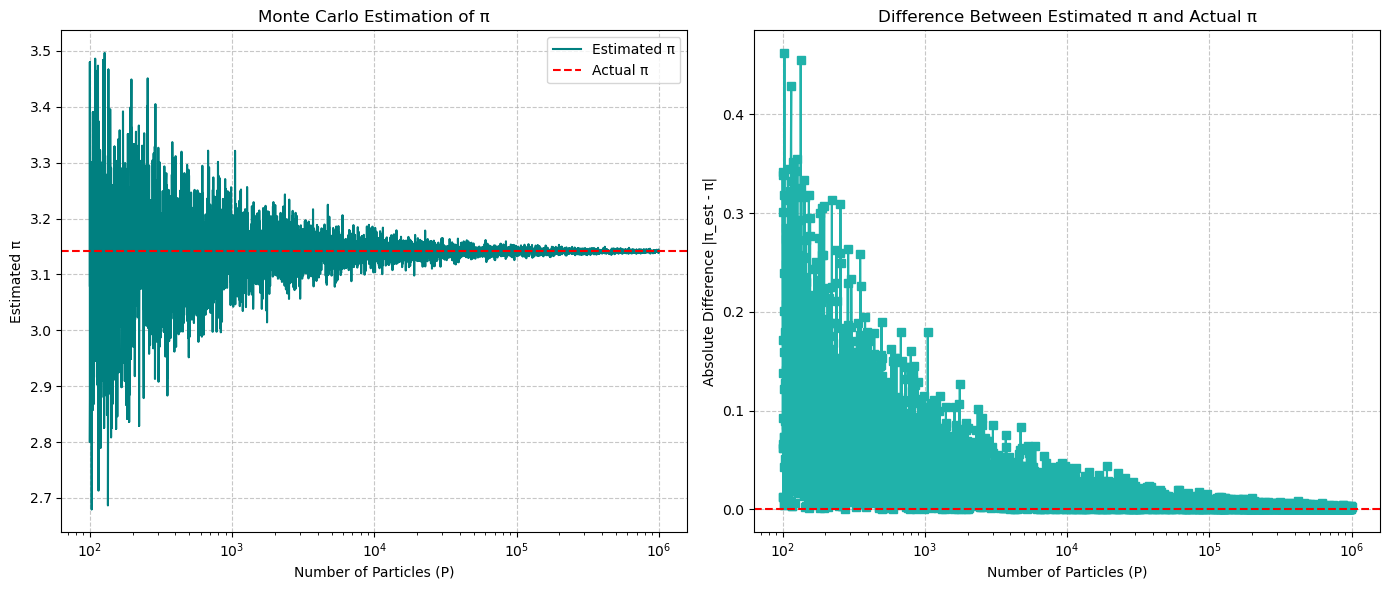

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

def estimate_pi(P):

    x = np.random.uniform(0, 1, P)
    y = np.random.uniform(0, 1, P)
    
    distances = (x - 0.5)**2 + (y - 0.5)**2
    n_inside = np.sum(distances <= 0.25)
    
    pi_est = 4 * n_inside / P
    return pi_est


particle_counts = np.logspace(2, 6, num=5000, dtype=int)

pi_estimates = []
pi_differences = []
for P in particle_counts:
    pi_est = estimate_pi(P)
    pi_estimates.append(pi_est)
    pi_differences.append(abs(pi_est - np.pi))

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(particle_counts, pi_estimates, color='teal', linestyle='-', label='Estimated π')
plt.axhline(y=np.pi, color='red', linestyle='--', label='Actual π')
plt.xscale('log')
plt.xlabel('Number of Particles (P)')
plt.ylabel('Estimated π')
plt.title('Monte Carlo Estimation of π')
plt.legend()
plt.grid(ls='--', alpha=0.7)


plt.subplot(1, 2, 2)
plt.plot(particle_counts, pi_differences, marker='s', linestyle='-', color='lightseagreen')
plt.axhline(y=0, color='r', linestyle='--')
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Number of Particles (P)')
plt.ylabel('Absolute Difference |π_est - π|')
plt.title('Difference Between Estimated π and Actual π')
plt.grid(ls='--', alpha=0.7)

plt.tight_layout()
plt.show()

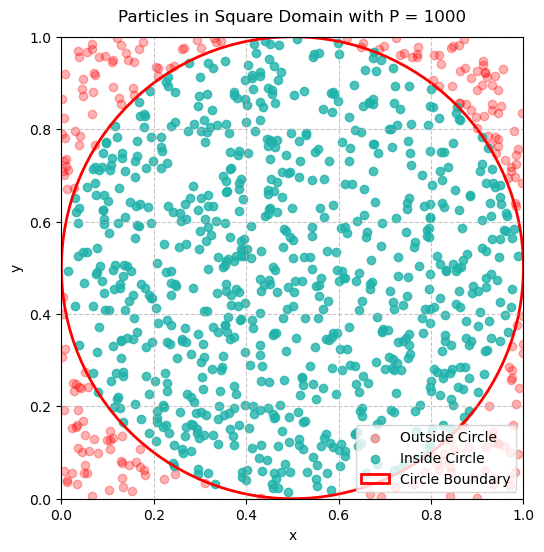

In [64]:
x_min, x_max = 0, 1
y_min, y_max = 0, 1
P = 1000  # number of particles

center = (0.5, 0.5)
radius = 0.5

x = np.random.uniform(x_min, x_max, P)
y = np.random.uniform(y_min, y_max, P)

distance_squared = (x - center[0])**2 + (y - center[1])**2
inside = distance_squared <= radius**2

plt.figure(figsize=(6,6))
plt.scatter(x[~inside], y[~inside], color='red', label='Outside Circle', alpha=0.3)
plt.scatter(x[inside], y[inside], color='lightseagreen', label='Inside Circle', alpha=0.8)

circle = plt.Circle(center, radius, color='red', fill=False, linewidth=2, label='Circle Boundary')
plt.gca().add_patch(circle)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.gca().set_aspect('equal', adjustable='box')

plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Particles in Square Domain with P = {P}', pad=11)
plt.legend(loc='lower right')
plt.grid(ls='--', alpha=0.7)
plt.show()


# Exercise 2 - Metropolis-Hastings

Using the Metropolis-Hastings algorithm, find the standard deviation $\sigma$ and mean value $\mu$ of a random Gaussian distribution. The data to be used for this exercise can be found in the file "input_data.txt".

**Approach (i.e. how the Metropolis-Hastings algorithm looks like):** Start with an initial guess for your standard deviation and mean (you can use the built-in numpy functions for this). 

Generate new values by adding some random noise to the previous/initial guess. Get the noise from a probability distribution. Use for example a Gaussian distribution which you can get via the function

In [65]:
from scipy.stats import norm
# norm(parameter, sigma_m).rvs()

from the scipy.stats package, where $sigma_m$ is the average step size. One can assume a value of 0.1 for this, or play around with this parameter and see what happens. Make sure your sigma isn't lower than zero, otherwise you will end up with NaNs or other weird values.

Compute the likelihood of your new values. Remember the likelihood formula from the lecture and apply it to your points. Compare the likelihood of the new and old values and accept the most relevant value. 

**Note:** Should the likelihood of your new value be lower than the older one, you can use the _acceptance-rejection criterion_ to determine which one to keep (see lecture slides and use a random _r_ value between 0 and 1).

Repeat until you converge on a value (ideally the same one as the values computed with the built-in functions).

For the following plots make sure to include the true values as well, i.e. overplot $\sigma$ and $\mu$ where relevant.

**a)** Plot $\mu$ as a function of the number of iterations.

**b)** Plot $\sigma$ as a function of the number of iterations.

**c)** Make a plot of the dataset you were given and overplot your best fit.

In [66]:
from scipy.stats import norm
data = np.loadtxt('input_data.txt')
std_numpy = np.std(data)
mean_numpy = np.mean(data)
print(f'numpy std {std_numpy}; numpy mean {mean_numpy}')
noise_std = norm(std_numpy, 0.1).rvs()
noise_mean = norm(mean_numpy, 0.1).rvs()
print(f'noise_std {noise_std}; noise_mean {noise_mean}')

likelihood_new_std = norm(std_numpy, 0.1).pdf(noise_std)
likelihood_new_mean = norm(mean_numpy, 0.1).pdf(noise_mean)

likelihood_old_std = norm(std_numpy, 0.1).pdf(std_numpy)
likelihood_old_mean = norm(mean_numpy, 0.1).pdf(mean_numpy)

final_std = noise_std if likelihood_new_std > likelihood_old_std else std_numpy
final_mean = noise_mean if likelihood_new_mean > likelihood_old_mean else mean_numpy
print(f'Final std: {final_std}; Final mean: {final_mean}')


numpy std 15.657268993174121; numpy mean 6.712507566383349
noise_std 15.680195232365378; noise_mean 6.5788303464207205
Final std: 15.657268993174121; Final mean: 6.712507566383349


In [ ]:
current_mean = np.mean(data)
current_std = np.std(data)


num_iterations = 10000
sigma_m = 0.1 
sigma_m = 0.1 
accepted = 0

mean_samples = []
std_samples = []

for _ in range(num_iterations):
    # Propose new mean and std
    proposed_mean = norm(current_mean, sigma_m).rvs()
    proposed_std = norm(current_std, sigma_m).rvs()
    
    if proposed_std <= 0:
        continue
    
    # Compute log-likelihood for current and proposed
    log_likelihood_current = np.sum(norm(current_mean, current_std).logpdf(data))
    log_likelihood_proposed = np.sum(norm(proposed_mean, proposed_std).logpdf(data))
    
    # Compute acceptance probability
    acceptance_prob = np.exp(log_likelihood_proposed - log_likelihood_current)
    
    # Accept or reject
    if np.random.rand() < acceptance_prob:
        current_mean = proposed_mean
        current_std = proposed_std
        accepted += 1
    
    # Store the samples
    mean_samples.append(current_mean)
    std_samples.append(current_std)


acceptance_rate = accepted / num_iterations
print(f'Acceptance Rate: {acceptance_rate:.2f}')

estimated_mean = np.mean(mean_samples)
estimated_std = np.mean(std_samples)
std_numpy = np.std(data)
mean_numpy = np.mean(data)
print(f'Estimated mean: {estimated_mean} -- NumPy mean: {mean_numpy};')
print(f'Estimated std: {estimated_std} -- NumPy std: {std_numpy}')

Acceptance Rate: 0.95
Estimated mean: 6.632795997793729 -- NumPy mean: 6.712507566383349;
Estimated std: 15.864405691623679 -- NumPy std: 15.657268993174121


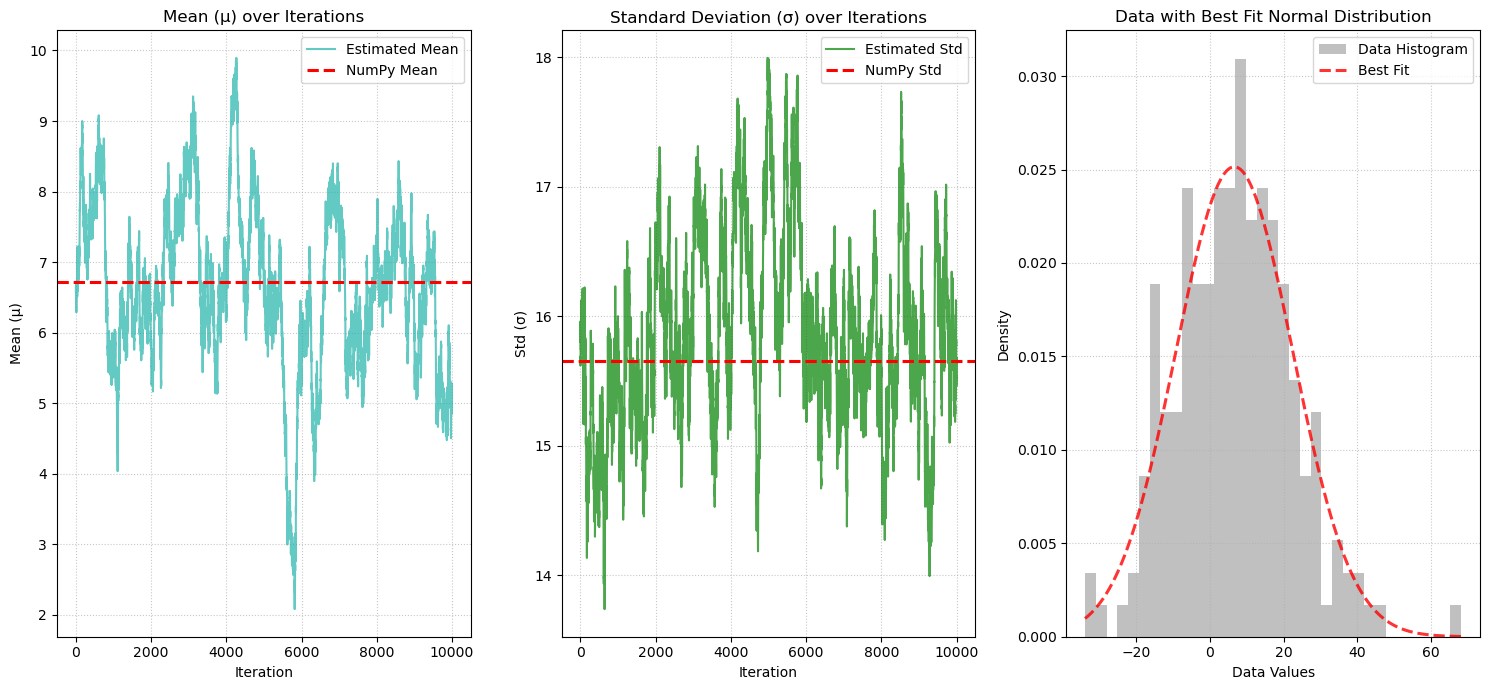

In [109]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 3, 1)
plt.plot(mean_samples, color='lightseagreen', alpha=0.7, label='Estimated Mean')
plt.axhline(y=numpy_mean, color='red', linestyle='--', label='NumPy Mean', linewidth=2.2)
plt.title('Mean (μ) over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Mean (μ)')
plt.legend()
plt.grid(ls=':', alpha=0.7)

# b) Plot σ as a function of the number of iterations
plt.subplot(1, 3, 2)
plt.plot(std_samples, color='green', alpha=0.7, label='Estimated Std')
plt.axhline(y=numpy_std, color='red', linestyle='--', label='NumPy Std', linewidth=2.2)
plt.title('Standard Deviation (σ) over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Std (σ)')
plt.legend()
plt.grid(ls=':', alpha=0.7)

# c) Plot the dataset and overplot the best fit
plt.subplot(1, 3, 3)
count, bins, ignored = plt.hist(data, bins=35, density=True, color='silver', label='Data Histogram')
# Best fit normal distribution
x = np.linspace(min(data), max(data), 1000)
best_fit = norm.pdf(x, estimated_mean, estimated_std)
plt.plot(x, best_fit, 'r--', lw=2.2, label='Best Fit', alpha=0.8)

plt.title('Data with Best Fit Normal Distribution')
plt.xlabel('Data Values')
plt.ylabel('Density')
plt.legend()
plt.grid(ls=':', alpha=0.7)
plt.tight_layout()
plt.show()